### In this assignment you will focus on structuring data using regular expressions, and using regular expressions to clean real text data, analysing the resulting dataset, and plot the associated frequency distributions of words in the dataset.

### In terms of the Data Science Pipeline, you will mainly be focusing on data cleaning and explorative data analysis.

# Part 1: Regular expression warmup

### In these questions, you are expected to use functionality from the Python regular expression module: re.

## 1.a

### Danish CPR numbers consist of a six-digit date (DDMMYY), followed by a 4 digit identifier (IIII). Using the re module, the task is to write and apply a regular expression that matches any CPR number, either in the DDMMYYIIII format, or in the DDMMYY-IIII format. The regular expression should contain four groups, such that the DD, MM, YY, and IIII parts can be extracted after matching.

In [1]:
import re

cprNumbers = '''1703055080
170305-5080
1812993719
181299-3719
280866-3927
0403688888''' 

pattern = re.compile(r'([0-9]{2})([0-9]{2})([0-9]{2})[ -]?([0-9]{4})')

for cprNumber in cprNumbers.split('\n'):
    match = pattern.search(cprNumber)
    if match:
        print(match.group())
        print(f"group 1: {match.group(1)}")
        print(f"group 2: {match.group(2)}")
        print(f"group 3: {match.group(3)}")
        print(f"group 4: {match.group(4)}")

1703055080
group 1: 17
group 2: 03
group 3: 05
group 4: 5080
170305-5080
group 1: 17
group 2: 03
group 3: 05
group 4: 5080
1812993719
group 1: 18
group 2: 12
group 3: 99
group 4: 3719
181299-3719
group 1: 18
group 2: 12
group 3: 99
group 4: 3719
280866-3927
group 1: 28
group 2: 08
group 3: 66
group 4: 3927
0403688888
group 1: 04
group 2: 03
group 3: 68
group 4: 8888


## 1.b

### The 4-digit identifier together with the last two digits of the date (i.e. the year), encodes in which century a person is born, using the following system

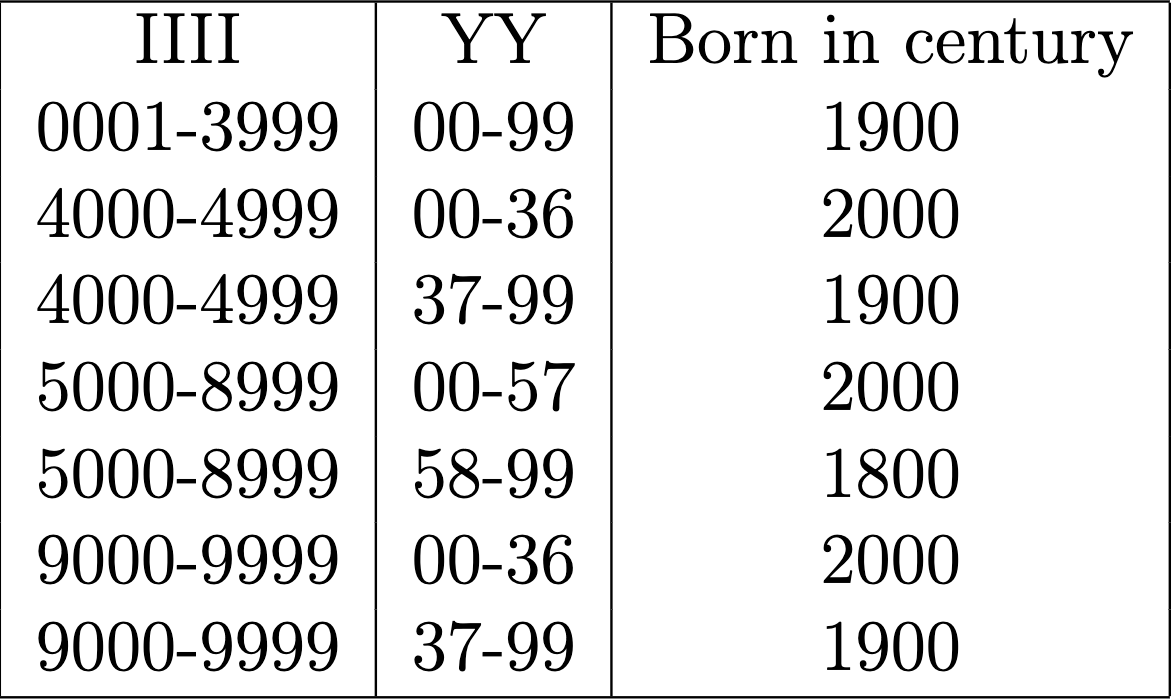

### Note that in this table, both numbers in a range are included (e.g. 00-99 includes both 00 and 99).

### Write a function that returns the relevant century based on the information in the table above, and returns either 1800, 1900 or 2000 (as an integer).

In [2]:
def getCentury(cprNumber):
    pattern = re.compile(r'([0-9]{2})([0-9]{2})([0-9]{2})[ -]?([0-9]{4})')
    match = pattern.search(cprNumber)
    if match:
        id = int(match.group(4))
        birthYear = int(match.group(3))
        if id <= 3999:
            return 1900
        if (id >= 4000) and (id <= 4999):
            if birthYear <= 36:
                return 2000
            else:
                return 1900
        if (id >= 5000) and (id <= 8999):
            if birthYear <= 57:
                return 2000
            else:
                return 1800
        if (id >= 9000) and (id <= 9999):
            if birthYear <= 36:
                return 2000
            else:
                return 1900
        else:
            return 'Could not find century'
    return 'Incorrect CPR number'

for cprNumber in cprNumbers.split('\n'):
    print(f"CPR-Number: {cprNumber} belongs to century: {getCentury(cprNumber)}")


CPR-Number: 1703055080 belongs to century: 2000
CPR-Number: 170305-5080 belongs to century: 2000
CPR-Number: 1812993719 belongs to century: 1900
CPR-Number: 181299-3719 belongs to century: 1900
CPR-Number: 280866-3927 belongs to century: 1900
CPR-Number: 0403688888 belongs to century: 1800


# Part 2: Processing the FakeNewsCorpus data set

### This part focuses on getting the FakeNewsCorpus dataset in a reasonable shape, and doing some initial exploration of the data. You will be working on a sample of the FakeNewsCorpus.

## 2.a

### Download the CSV onto your computer

## 2.b

### Read the CSV file into memory

In [53]:
import pandas as pd

newsData = pd.read_csv('news_sample.csv')
newsData.head(5)

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


## 2.c

### Manually inspect the data to get an idea of potential problems of the data structure and representation that need to be fixed.

The data is not very human-friendly (hard to find specific information)

## 2.d

### Clean the data. First, you’ll try to do this manually, by writing our own cleanText() function that uses regular expressions. The function should take raw text as input and return a version of the text with the following modifications:

* ### all words must be lowercased
* ### it should not contain multiple white spaces, tabs, or new lines
* ### numbers, dates, emails, and URLs should be replaced by "< NUM >", "< DATE >", "< EMAIL >" AND "< URL >", respectively. Note that replacing dates with <DATE> is particularly tricky as dates can be expressed in many forms. You may just choose one or a few common date formats present in the data set and only replace those. (Be careful about tokenizing <> symbols because these are punctuation in most Tokenizers).

In [ ]:
def cleanText():
    newsData['content'] = newsData['content'].str.lower()
    newsData['content'] = newsData['content'].replace(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b', '<DATE>', regex=True)
    newsData['content'] = newsData['content'].replace(r'\b[\w\.-]+?@\w+?\.\w+?\b', '<EMAIL>', regex=True)
    newsData['content'] = newsData['content'].replace(r'http\S+|www\S+', '<URL>', regex=True)
    newsData['content'] = newsData['content'].replace(r'[0-9]+', '<NUM>', regex=True)
    newsData['content'] = newsData['content'].replace(r'\s+', ' ', regex=True)
    return newsData

cleanedNewsData = cleanText()
cleanedNewsData.to_csv('cleaned_news_sample.csv', index=False)
cleanedNewsData.head(5)

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,sometimes the power of christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,awakening of <NUM> strands of dna – “reconnect...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,never hike alone: a friday the <NUM>th fan fil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"when a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,donald trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


## 2.e

Now, try to use a library for cleaning the data. The clean-text module
provides out-of-the-box functionality for much of the cleaning you did in
the previous step (pip install clean-text). Use it to implement the same
cleaning steps as in your own cleanText() implementation.

# Part 3: Descriptive frequency analysis of the data

Now, you will do some simple exploration of the data to understand the
effect of preprocessing conducted in Part 2, namely to the vocabulary,
and the frequency distribution of the vocabulary across documents.

## 3.a

Calculate the number of unique words in the data after preprocessing
and compare it to the number of unique words before preprocessing (i.e.
in the raw data).

## 3.b

Calculate how frequently each of these words is used in the dataset.
Sort this list, so that the most frequent word appears first, and then use
Python’s matplotlib library to plot a barplot where the 50 most frequent
words appear on the x-axis, and their frequency appears on the y-axis.